<img src="./julia_logo.png" align="center" width="400"/>

System information (for reproducibility)

In [1]:
versioninfo()

Julia Version 1.8.5
Commit 17cfb8e65ea (2023-01-08 06:45 UTC)
Platform Info:
  OS: macOS (arm64-apple-darwin21.5.0)
  CPU: 12 × Apple M2 Max
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-13.0.1 (ORCJIT, apple-m1)
  Threads: 1 on 8 virtual cores
Environment:
  JULIA_EDITOR = code


Load packages:

In [2]:
using Pkg
Pkg.activate(pwd())
Pkg.instantiate()
Pkg.status()

  Activating project at `~/Documents/github.com/ucla-biostat-257/2023spring/slides/03-juliaintro`


Status `~/Documents/github.com/ucla-biostat-257/2023spring/slides/03-juliaintro/Project.toml`
  [6e4b80f9] BenchmarkTools v1.3.2
  [31c24e10] Distributions v0.25.86
  [6f49c342] RCall v0.13.14
  [37e2e46d] LinearAlgebra
  [9abbd945] Profile
  [2f01184e] SparseArrays


In [3]:
using BenchmarkTools, Distributions, RCall
using LinearAlgebra, Profile, SparseArrays

## What's Julia?

> Julia is a high-level, high-performance dynamic programming language for technical computing, with syntax that is familiar to users of other technical computing environments

* History:
  - Project started in 2009. First public release in 2012 
  - Creators: Jeff Bezanson, Alan Edelman, Stefan Karpinski, Viral Shah
  - First major release v1.0 was released on Aug 8, 2018
  - Current stable release v1.7.2

* Aim to solve the notorious **two language problem**: Prototype code goes into high-level languages like R/Python, production code goes into low-level language like C/C++. 

    Julia aims to:
> Walks like Python. Runs like C.

<img src="./julia_vs_otherlang.png" align="center" width="600"/>

See <https://julialang.org/benchmarks/> for the details of benchmark.

* Write high-level, abstract code that closely resembles mathematical formulas
    - yet produces fast, low-level machine code that has traditionally only been generated by static languages.

* Julia is more than just "Fast R" or "Fast Matlab"
    - Performance comes from features that work well together.  
    - You can't just take the magic dust that makes Julia fast and sprinkle it on [language of choice]

## Learning resources

1. The (free) online course [Introduction to Julia](https://juliaacademy.com/p/intro-to-julia), by Jane Herriman. 

2. Cheat sheet: [The Fast Track to Julia](https://juliadocs.github.io/Julia-Cheat-Sheet/).  

3. Browse the Julia [documentation](https://docs.julialang.org/en).  

4. For Matlab users, read [Noteworthy Differences From Matlab](https://docs.julialang.org/en/v1/manual/noteworthy-differences/#Noteworthy-differences-from-MATLAB-1).  

    For R users, read [Noteworthy Differences From R](https://docs.julialang.org/en/v1/manual/noteworthy-differences/#Noteworthy-differences-from-R-1).  

    For Python users, read [Noteworthy Differences From Python](https://docs.julialang.org/en/v1/manual/noteworthy-differences/?highlight=matlab#Noteworthy-differences-from-Python-1).  

5. The [Learning page](http://julialang.org/learning/) on Julia's website has pointers to many other learning resources.  

## Julia REPL (Read-Evaluation-Print-Loop)

The `Julia` REPL, or `Julia` shell, has at least five modes.

1. **Default mode** is the Julian prompt `julia>`. Type backspace in other modes to enter default mode.    

2. **Help mode** `help?>`. Type `?` to enter help mode. `?search_term` does a fuzzy search for `search_term`.  

3. **Shell mode** `shell>`. Type `;` to enter shell mode.  

4. **Package mode** `(@v1.7) pkg>`. Type `]` to enter package mode for managing Julia packages (install, uninstall, update, ...).

5. **Search mode** `(reverse-i-search)`. Press `ctrl+R` to enter search model. 

6. With `RCall.jl` package installed, we can enter the **R mode** by typing `$` (shift+4) at Julia REPL.

Some survival commands in Julia REPL:  
1. `exit()` or `Ctrl+D`: exit Julia.

2. `Ctrl+C`: interrupt execution.

3. `Ctrl+L`: clear screen.

0. Append `;` (semi-colon) to suppress displaying output from a command. Same as Matlab.

0. `include("filename.jl")` to source a Julia code file.

## Seek help

* Online help from REPL: `?function_name`.

* Google.

* Julia documentation: <https://docs.julialang.org/en/>.

* Look up source code: `@edit sin(π)`.

* Discourse: <https://discourse.julialang.org>.

* Friends.

## Which IDE?

* Julia homepage lists many choices: Juno, VS Code, Vim, ...

* Unfortunately at the moment there are no mature RStudio- or Matlab-like IDE for Julia yet.

* For dynamic document, e.g., homework, I recommend [Jupyter Notebook](https://jupyter.org/install.html) or [JupyterLab](http://jupyterlab.readthedocs.io/en/stable/). 

* For extensive Julia coding, myself has been happily using the editor [VS Code](https://code.visualstudio.com) with extensions `Julia` and `VS Code Jupyter Notebook Previewer` installed. 

## Julia package system

* Each Julia package is a Git repository. Each Julia package name ends with `.jl`. E.g., `Distributions.jl` package lives at <https://github.com/JuliaStats/Distributions.jl>.   
Google search with `PackageName.jl` usually leads to the package on github.com. 

* The package ecosystem is rapidly maturing; a complete list of **registered** packages (which are required to have a certain level of testing and documentation) is at [http://pkg.julialang.org/](http://pkg.julialang.org/).

* For example, the package called `Distributions.jl` is added with
```julia
# in Pkg mode
(@v1.7) pkg> add Distributions
```
and "removed" (although not completely deleted) with
```julia
# in Pkg mode
(@v1.7) pkg> rm Distributions
```
* The package manager provides a dependency solver that determines which packages are actually required to be installed.

* **Non-registered** packages are added by cloning the relevant Git repository. E.g.,
```julia
# in Pkg mode
(@v1.7) pkg> add https://github.com/OpenMendel/SnpArrays.jl
```

* A package needs only be added once, at which point it is downloaded into your local `.julia/packages` directory in your home directory. 

In [4]:
readdir(Sys.islinux() ? ENV["JULIA_PATH"] * "/pkg/packages" : ENV["HOME"] * "/.julia/packages")

398-element Vector{String}:
 "AMD"
 "ASL_jll"
 "AbstractFFTs"
 "AbstractTrees"
 "Adapt"
 "AlgebraicMultigrid"
 "Animations"
 "ArnoldiMethod"
 "Arpack"
 "Arpack_jll"
 "ArrayInterface"
 "ArrayInterfaceCore"
 "Arrow"
 ⋮
 "fzf_jll"
 "isoband_jll"
 "libaom_jll"
 "libass_jll"
 "libfdk_aac_jll"
 "libpng_jll"
 "libsixel_jll"
 "libsodium_jll"
 "libvorbis_jll"
 "x264_jll"
 "x265_jll"
 "xkbcommon_jll"

* Directory of a specific package can be queried by `pathof()`:

In [5]:
pathof(Distributions)

"/Users/huazhou/.julia/packages/Distributions/YQQXX/src/Distributions.jl"

* If you start having problems with packages that seem to be unsolvable, you may try just deleting your .julia directory and reinstalling all your packages. 

* Periodically, one should run `update` in Pkg mode, which checks for, downloads and installs updated versions of all the packages you currently have installed.

* `status` lists the status of all installed packages.

* Using functions in package.
```julia
using Distributions
```
This pulls all of the *exported* functions in the module into your local namespace, as you can check using the `whos()` command. An alternative is
```julia
import Distributions
```
Now, the functions from the Distributions package are available only using 
```julia
Distributions.<FUNNAME>
```
All functions, not only exported functions, are always available like this.

## Calling R from Julia

* The [`RCall.jl`](https://github.com/JuliaInterop/RCall.jl) package allows us to embed R code inside of Julia.

* There are also `PyCall.jl`, `MATLAB.jl`, `JavaCall.jl`, `CxxWrap.jl` packages for interfacing with other languages.

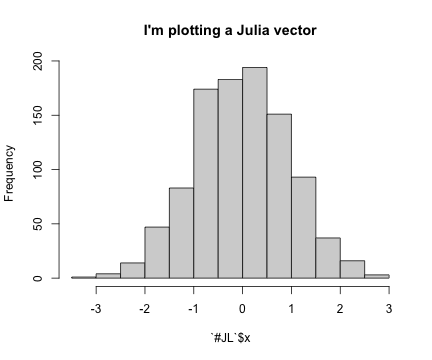

RObject{VecSxp}
$breaks
 [1] -3.5 -3.0 -2.5 -2.0 -1.5 -1.0 -0.5  0.0  0.5  1.0  1.5  2.0  2.5  3.0

$counts
 [1]   1   4  14  47  83 174 183 194 151  93  37  16   3

$density
 [1] 0.002 0.008 0.028 0.094 0.166 0.348 0.366 0.388 0.302 0.186 0.074 0.032
[13] 0.006

$mids
 [1] -3.25 -2.75 -2.25 -1.75 -1.25 -0.75 -0.25  0.25  0.75  1.25  1.75  2.25
[13]  2.75

$xname
[1] "`#JL`$x"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"


In [6]:
x = randn(1000)
# $ is the interpolation operator
R"""
hist($x, main="I'm plotting a Julia vector")
"""

┌ Warning: RCall.jl: Warning: `qplot()` was deprecated in ggplot2 3.4.0.
└ @ RCall ~/.julia/packages/RCall/Wyd74/src/io.jl:172
┌ Warning: RCall.jl: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
└ @ RCall ~/.julia/packages/RCall/Wyd74/src/io.jl:172


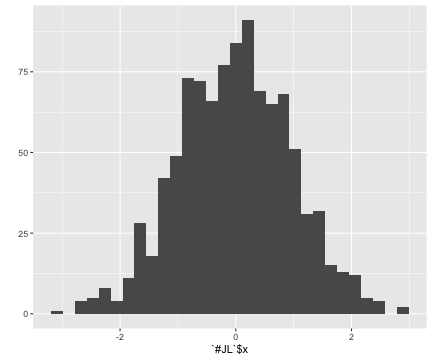

RObject{VecSxp}


In [7]:
R"""
library(ggplot2)
qplot($x)
"""

In [8]:
x = R"""
rnorm(10)
"""

RObject{RealSxp}
 [1] -0.029540515  0.689921173 -0.002061094  2.606730587 -0.378020100
 [6]  0.002283632 -0.049763029 -0.946038554  0.758658319  0.420015656


In [9]:
# collect R variable into Julia workspace
y = collect(x)

10-element Vector{Float64}:
 -0.029540515426246035
  0.6899211732269374
 -0.002061094326352103
  2.606730586904021
 -0.3780201004868831
  0.002283631946194161
 -0.04976302902436753
 -0.9460385544885526
  0.7586583190647372
  0.42001565601608826

* Access Julia variables in R REPL mode:
```julia
julia> x = rand(5) # Julia variable
R> y <- $x
```

* Pass Julia expression in R REPL mode:
```julia
R> y <- $(rand(5))
```

* Put Julia variable into R environment:
```julia
julia> @rput x
R> x
```

* Get R variable into Julia environment:
```julia
R> r <- 2
Julia> @rget r
```

* If you want to call Julia within R, check out the [`JuliaCall`](https://www.rdocumentation.org/packages/JuliaCall/) package.

## Some basic Julia code

In [10]:
# an integer, same as int in R
y = 1

1

In [11]:
# query type of a Julia object
typeof(y)

Int64

In [12]:
# a Float64 number, same as double in R
y = 1.0

1.0

In [13]:
typeof(y) 

Float64

In [14]:
# Greek letters:  `\pi<tab>`
π

π = 3.1415926535897...

In [15]:
typeof(π)

Irrational{:π}

In [16]:
# Greek letters:  `\theta<tab>`
θ = y + π

4.141592653589793

In [17]:
# emoji! `\:kissing_cat:<tab>`
😽 = 5.0
😽 + 1

6.0

In [18]:
# `\alpha<tab>\hat<tab>`
α̂ = π

π = 3.1415926535897...

For a list of unicode symbols that can be tab-completed, see <https://docs.julialang.org/en/v1/manual/unicode-input/>. Or in the help mode, type `?` followed by the unicode symbol you want to input.

In [19]:
# vector of Float64 0s
x = zeros(5)

5-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0

In [20]:
# vector Int64 0s
x = zeros(Int, 5)

5-element Vector{Int64}:
 0
 0
 0
 0
 0

In [21]:
# matrix of Float64 0s
x = zeros(5, 3)

5×3 Matrix{Float64}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [22]:
# matrix of Float64 1s
x = ones(5, 3)

5×3 Matrix{Float64}:
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0

In [23]:
# define array without initialization
x = Matrix{Float64}(undef, 5, 3)

5×3 Matrix{Float64}:
 2.93867e-314  2.93867e-314  2.93867e-314
 2.93867e-314  2.93867e-314  2.93867e-314
 2.93867e-314  2.93867e-314  2.93867e-314
 2.93867e-314  2.93867e-314  2.93867e-314
 2.93867e-314  2.93867e-314  2.94945e-314

In [24]:
# fill a matrix by 0s
fill!(x, 0)

5×3 Matrix{Float64}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [25]:
# initialize an array to be constant 2.5
fill(2.5, (5, 3))

5×3 Matrix{Float64}:
 2.5  2.5  2.5
 2.5  2.5  2.5
 2.5  2.5  2.5
 2.5  2.5  2.5
 2.5  2.5  2.5

In [26]:
# rational number
a = 3//5

3//5

In [27]:
typeof(a)

Rational{Int64}

In [28]:
b = 3//7

3//7

In [29]:
a + b

36//35

In [30]:
# uniform [0, 1) random numbers
x = rand(5, 3)

5×3 Matrix{Float64}:
 0.0298406   0.0305414  0.0849982
 0.317244    0.305128   0.117463
 0.165645    0.256696   0.219659
 0.805286    0.920127   0.181984
 0.00411846  0.941584   0.704493

In [31]:
# uniform random numbers (in single precision)
x = rand(Float16, 5, 3)

5×3 Matrix{Float16}:
 0.1538  0.599   0.591
 0.5063  0.6724  0.3154
 0.662   0.681   0.9243
 0.9316  0.9683  0.4731
 0.3662  0.87    0.07666

In [32]:
# random numbers from {1,...,5}
x = rand(1:5, 5, 3)

5×3 Matrix{Int64}:
 5  3  4
 4  4  3
 2  5  4
 5  4  2
 2  4  2

In [33]:
# standard normal random numbers
x = randn(5, 3)

5×3 Matrix{Float64}:
  0.020337   0.0396833  -0.579053
 -1.8163     0.877481    0.377704
  0.862128  -0.267132   -0.183927
 -1.46359   -1.10429     1.61689
  1.0333    -1.82406     1.11012

In [34]:
# range
1:10

1:10

In [35]:
typeof(1:10)

UnitRange{Int64}

In [36]:
1:2:10

1:2:9

In [37]:
typeof(1:2:10)

StepRange{Int64, Int64}

In [38]:
# integers 1-10
x = collect(1:10)

10-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [39]:
# or equivalently
[1:10...]

10-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [40]:
# Float64 numbers 1-10
x = collect(1.0:10)

10-element Vector{Float64}:
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0

In [41]:
# convert to a specific type
convert(Vector{Float64}, 1:10)

10-element Vector{Float64}:
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0

## Matrices and vectors

### Dimensions

In [42]:
x = randn(5, 3)

5×3 Matrix{Float64}:
 -1.28772   -0.83864   -0.12497
 -0.482202  -2.49738    0.349893
 -0.120086  -1.67172    1.67436
  1.2564    -2.08573    1.1603
  0.285802   0.666668   0.35843

In [43]:
size(x)

(5, 3)

In [44]:
size(x, 1) # nrow() in R

5

In [45]:
size(x, 2) # ncol() in R

3

In [46]:
# total number of elements
length(x)

15

### Indexing

In [47]:
# 5 × 5 matrix of random Normal(0, 1)
x = randn(5, 5)

5×5 Matrix{Float64}:
 -0.379566   0.229034  0.0614685  -0.0661966   0.62037
  1.27646    1.17119   0.573543   -0.284712    0.799527
  0.136237  -1.24316   0.0354331   0.785961    0.510887
  0.353179   0.656947  0.437236   -0.0185383  -0.245248
 -1.73517   -1.21317   0.14225     0.311921    0.133698

In [48]:
# first column
x[:, 1]

5-element Vector{Float64}:
 -0.3795656168645461
  1.276459921377315
  0.13623654888766296
  0.35317877167671957
 -1.7351654792028852

In [49]:
# first row
x[1, :]

5-element Vector{Float64}:
 -0.3795656168645461
  0.22903394744734804
  0.06146846086429474
 -0.06619660230555796
  0.6203704916007861

In [50]:
# sub-array
x[1:2, 2:3]

2×2 Matrix{Float64}:
 0.229034  0.0614685
 1.17119   0.573543

In [51]:
# getting a subset of a matrix creates a copy, but you can also create "views"
z = view(x, 1:2, 2:3)

2×2 view(::Matrix{Float64}, 1:2, 2:3) with eltype Float64:
 0.229034  0.0614685
 1.17119   0.573543

In [52]:
# same as
@views z = x[1:2, 2:3]

2×2 view(::Matrix{Float64}, 1:2, 2:3) with eltype Float64:
 0.229034  0.0614685
 1.17119   0.573543

In [53]:
# change in z (view) changes x as well
z[2, 2] = 0.0
x

5×5 Matrix{Float64}:
 -0.379566   0.229034  0.0614685  -0.0661966   0.62037
  1.27646    1.17119   0.0        -0.284712    0.799527
  0.136237  -1.24316   0.0354331   0.785961    0.510887
  0.353179   0.656947  0.437236   -0.0185383  -0.245248
 -1.73517   -1.21317   0.14225     0.311921    0.133698

In [54]:
# y points to same data as x
y = x

5×5 Matrix{Float64}:
 -0.379566   0.229034  0.0614685  -0.0661966   0.62037
  1.27646    1.17119   0.0        -0.284712    0.799527
  0.136237  -1.24316   0.0354331   0.785961    0.510887
  0.353179   0.656947  0.437236   -0.0185383  -0.245248
 -1.73517   -1.21317   0.14225     0.311921    0.133698

In [55]:
# x and y point to same data
pointer(x), pointer(y)

(Ptr{Float64} @0x00000002a62cd640, Ptr{Float64} @0x00000002a62cd640)

In [56]:
# changing y also changes x
y[:, 1] .= 0
x

5×5 Matrix{Float64}:
 0.0   0.229034  0.0614685  -0.0661966   0.62037
 0.0   1.17119   0.0        -0.284712    0.799527
 0.0  -1.24316   0.0354331   0.785961    0.510887
 0.0   0.656947  0.437236   -0.0185383  -0.245248
 0.0  -1.21317   0.14225     0.311921    0.133698

In [57]:
# create a new copy of data
z = copy(x)

5×5 Matrix{Float64}:
 0.0   0.229034  0.0614685  -0.0661966   0.62037
 0.0   1.17119   0.0        -0.284712    0.799527
 0.0  -1.24316   0.0354331   0.785961    0.510887
 0.0   0.656947  0.437236   -0.0185383  -0.245248
 0.0  -1.21317   0.14225     0.311921    0.133698

In [58]:
pointer(x), pointer(z)

(Ptr{Float64} @0x00000002a62cd640, Ptr{Float64} @0x0000000161b47840)

### Concatenate matrices

In [59]:
# 3-by-1 vector
[1, 2, 3]

3-element Vector{Int64}:
 1
 2
 3

In [60]:
# 1-by-3 array
[1 2 3]

1×3 Matrix{Int64}:
 1  2  3

In [61]:
# multiple assignment by tuple
x, y, z = randn(5, 3), randn(5, 2), randn(3, 5)

([1.0854666894181073 0.8182085244682221 -1.794595180548054; 1.680222770904371 1.1463955698624815 -0.2781629694619079; … ; 0.383813353927503 -0.7830822329270867 -0.08493823591064384; 1.2320400456497551 -0.11196864840671289 -0.6595993846111823], [-0.8673316786046898 0.9993898582562595; 1.1216713398946103 -0.4691335463210992; … ; 0.7080737325599884 -0.07552984616417215; -0.6934379610632996 0.47810788279489513], [-1.5466516143805757 -2.5447129284534236 … -1.2456977150388113 1.0457254384175318; -0.07873033886382846 0.08888218478706415 … -1.445114676156458 1.2037254334538001; 0.8039254061053368 1.0390317764010717 … -0.22041765120347678 -2.9333631496012686])

In [62]:
[x y] # 5-by-5 matrix

5×5 Matrix{Float64}:
 1.08547    0.818209   -1.7946     -0.867332   0.99939
 1.68022    1.1464     -0.278163    1.12167   -0.469134
 0.949584  -0.0940768  -0.859389    1.16673   -1.26553
 0.383813  -0.783082   -0.0849382   0.708074  -0.0755298
 1.23204   -0.111969   -0.659599   -0.693438   0.478108

In [63]:
[x y; z] # 8-by-5 matrix

8×5 Matrix{Float64}:
  1.08547     0.818209   -1.7946     -0.867332   0.99939
  1.68022     1.1464     -0.278163    1.12167   -0.469134
  0.949584   -0.0940768  -0.859389    1.16673   -1.26553
  0.383813   -0.783082   -0.0849382   0.708074  -0.0755298
  1.23204    -0.111969   -0.659599   -0.693438   0.478108
 -1.54665    -2.54471     0.0742352  -1.2457     1.04573
 -0.0787303   0.0888822  -0.84975    -1.44511    1.20373
  0.803925    1.03903    -0.836733   -0.220418  -2.93336

### Dot operation

Dot operation in Julia is elementwise operation, similar to Matlab.

In [64]:
x = randn(5, 3)

5×3 Matrix{Float64}:
  0.524137  -0.348094    0.928294
  0.598817  -1.74398    -0.384517
 -2.04176   -3.0242     -0.0471307
  0.291878   0.981976   -0.656574
  0.105405  -0.0806221  -0.844992

In [65]:
y = ones(5, 3)

5×3 Matrix{Float64}:
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0

In [66]:
x .* y # same x * y in R

5×3 Matrix{Float64}:
  0.524137  -0.348094    0.928294
  0.598817  -1.74398    -0.384517
 -2.04176   -3.0242     -0.0471307
  0.291878   0.981976   -0.656574
  0.105405  -0.0806221  -0.844992

In [67]:
x .^ (-2)

5×3 Matrix{Float64}:
  3.64008     8.25289     1.16046
  2.78876     0.328787    6.76346
  0.239877    0.10934   450.185
 11.7381      1.03705     2.3197
 90.0079    153.848       1.40054

In [68]:
sin.(x)

5×3 Matrix{Float64}:
  0.500466  -0.341107    0.800599
  0.563666  -0.98504    -0.375111
 -0.89113   -0.117125   -0.0471133
  0.287751   0.831596   -0.610407
  0.10521   -0.0805348  -0.747966

### Basic linear algebra

In [69]:
x = randn(5)

5-element Vector{Float64}:
 -0.18169246928272914
  1.1274282964693
 -1.3885087458679846
 -1.435316385465308
  1.65220914636905

In [70]:
# vector L2 norm
norm(x)

2.832312031566499

In [71]:
# same as
sqrt(sum(abs2, x))

2.832312031566499

In [72]:
y = randn(5) # another vector
# dot product
dot(x, y) # x' * y

3.3659435254244534

In [73]:
# same as
x'y

3.3659435254244534

In [74]:
x, y = randn(5, 3), randn(3, 2)
# matrix multiplication, same as %*% in R
x * y

5×2 Matrix{Float64}:
  1.92602     2.50412
 -1.83941    -2.08628
  0.0840627   0.370649
  0.0625599   2.41478
 -0.741593   -1.44771

In [75]:
x = randn(3, 3)

3×3 Matrix{Float64}:
 0.679883   1.49978    1.4166
 0.741681   0.367478   1.17795
 0.670316  -0.551409  -0.326675

In [76]:
# conjugate transpose
x'

3×3 adjoint(::Matrix{Float64}) with eltype Float64:
 0.679883  0.741681   0.670316
 1.49978   0.367478  -0.551409
 1.4166    1.17795   -0.326675

In [77]:
b = rand(3)
x'b # same as x' * b

3-element Vector{Float64}:
 0.8930124981996744
 1.0817278777243142
 1.3373520903367393

In [78]:
# trace
tr(x)

0.7206853338076328

In [79]:
det(x)

0.9792971587174452

In [80]:
rank(x)

3

### Sparse matrices

In [81]:
# 10-by-10 sparse matrix with sparsity 0.1
X = sprandn(10, 10, .1)

10×10 SparseMatrixCSC{Float64, Int64} with 15 stored entries:
  ⋅    ⋅          ⋅        ⋅     ⋅         …    ⋅           ⋅        2.09658
  ⋅    ⋅          ⋅        ⋅     ⋅              ⋅           ⋅         ⋅ 
  ⋅    ⋅          ⋅        ⋅     ⋅            -0.998095     ⋅         ⋅ 
  ⋅    ⋅          ⋅        ⋅     ⋅              ⋅           ⋅         ⋅ 
  ⋅   0.603879    ⋅        ⋅     ⋅              ⋅           ⋅         ⋅ 
  ⋅    ⋅          ⋅        ⋅   -0.0707276  …    ⋅           ⋅         ⋅ 
  ⋅    ⋅          ⋅        ⋅     ⋅            -0.184732   -0.995277   ⋅ 
  ⋅   0.754405  -1.24013   ⋅     ⋅              ⋅           ⋅         ⋅ 
  ⋅    ⋅          ⋅        ⋅     ⋅            -0.0630867   0.764078   ⋅ 
  ⋅    ⋅          ⋅        ⋅     ⋅              ⋅           ⋅        0.303565

In [82]:
# dump() in Julia is like str() in R
dump(X)

SparseMatrixCSC{Float64, Int64}
  m: Int64 10
  n: Int64 10
  colptr: Array{Int64}((11,)) [1, 1, 3, 4, 4, 5, 7, 9, 12, 14, 16]
  rowval: Array{Int64}((15,)) [5, 8, 8, 6, 2, 3, 2, 9, 3, 7, 9, 7, 9, 1, 10]
  nzval: Array{Float64}((15,)) [0.6038794232834686, 0.7544047761378647, -1.2401264637192548, -0.07072764136242198, -1.043729061160816, 0.899261811950289, -1.5277350411592634, 1.230233534653571, -0.9980946897614759, -0.18473206454445515, -0.06308667088103617, -0.9952774577050482, 0.7640779164704025, 2.0965782299049205, 0.30356463396052086]


In [83]:
# convert to dense matrix; be cautious when dealing with big data
Xfull = convert(Matrix{Float64}, X)

10×10 Matrix{Float64}:
 0.0  0.0        0.0      0.0   0.0        …   0.0         0.0       2.09658
 0.0  0.0        0.0      0.0   0.0            0.0         0.0       0.0
 0.0  0.0        0.0      0.0   0.0           -0.998095    0.0       0.0
 0.0  0.0        0.0      0.0   0.0            0.0         0.0       0.0
 0.0  0.603879   0.0      0.0   0.0            0.0         0.0       0.0
 0.0  0.0        0.0      0.0  -0.0707276  …   0.0         0.0       0.0
 0.0  0.0        0.0      0.0   0.0           -0.184732   -0.995277  0.0
 0.0  0.754405  -1.24013  0.0   0.0            0.0         0.0       0.0
 0.0  0.0        0.0      0.0   0.0           -0.0630867   0.764078  0.0
 0.0  0.0        0.0      0.0   0.0            0.0         0.0       0.303565

In [84]:
# convert a dense matrix to sparse matrix
sparse(Xfull)

10×10 SparseMatrixCSC{Float64, Int64} with 15 stored entries:
  ⋅    ⋅          ⋅        ⋅     ⋅         …    ⋅           ⋅        2.09658
  ⋅    ⋅          ⋅        ⋅     ⋅              ⋅           ⋅         ⋅ 
  ⋅    ⋅          ⋅        ⋅     ⋅            -0.998095     ⋅         ⋅ 
  ⋅    ⋅          ⋅        ⋅     ⋅              ⋅           ⋅         ⋅ 
  ⋅   0.603879    ⋅        ⋅     ⋅              ⋅           ⋅         ⋅ 
  ⋅    ⋅          ⋅        ⋅   -0.0707276  …    ⋅           ⋅         ⋅ 
  ⋅    ⋅          ⋅        ⋅     ⋅            -0.184732   -0.995277   ⋅ 
  ⋅   0.754405  -1.24013   ⋅     ⋅              ⋅           ⋅         ⋅ 
  ⋅    ⋅          ⋅        ⋅     ⋅            -0.0630867   0.764078   ⋅ 
  ⋅    ⋅          ⋅        ⋅     ⋅              ⋅           ⋅        0.303565

In [85]:
# syntax for sparse linear algebra is same as dense linear algebra
β = ones(10)
X * β

10-element Vector{Float64}:
  2.0965782299049205
 -2.5714641023200793
 -0.09883287781118688
  0.0
  0.6038794232834686
 -0.07072764136242198
 -1.1800095222495033
 -0.4857216875813901
  1.9312247802429372
  0.30356463396052086

In [86]:
# many functions apply to sparse matrices as well
sum(X)

0.5284912360672658

## Control flow and loops

* if-elseif-else-end

```julia
if condition1
    # do something
elseif condition2
    # do something
else
    # do something
end
```

* `for` loop

```julia
for i in 1:10
    println(i)
end
```

* Nested `for` loop:

```julia
for i in 1:10
    for j in 1:5
        println(i * j)
    end
end
```
Same as

```julia
for i in 1:10, j in 1:5
    println(i * j)
end
```

* Exit loop:

```julia
for i in 1:10
    # do something
    if condition1
        break # skip remaining loop
    end
end
```

* Exit iteration:  

```julia
for i in 1:10
    # do something
    if condition1
        continue # skip to next iteration
    end
    # do something
end
```

## Functions 

* In Julia, all arguments to functions are **passed by reference**, in contrast to R and Matlab.

* Function names ending with `!` indicates that function mutates at least one argument, typically the first.
```julia
sort!(x) # vs sort(x)
```

* Function definition

```julia
function func(req1, req2; key1=dflt1, key2=dflt2)
    # do stuff
    return out1, out2, out3
end
```
**Required arguments** are separated with a comma and use the positional notation.  
**Optional arguments** need a default value in the signature.  
**Semicolon** is not required in function call.  
**return** statement is optional.  
Multiple outputs can be returned as a **tuple**, e.g., `return out1, out2, out3`.  

* Anonymous functions, e.g., `x -> x^2`, is commonly used in collection function or list comprehensions.
```julia
map(x -> x^2, y) # square each element in x
```

* Functions can be nested:

```julia
function outerfunction()
    # do some outer stuff
    function innerfunction()
        # do inner stuff
        # can access prior outer definitions
    end
    # do more outer stuff
end
```

* Functions can be vectorized using the Dot syntax:

In [87]:
# defined for scalar
function myfunc(x)
    return sin(x^2)
end

x = randn(5, 3)
myfunc.(x)

5×3 Matrix{Float64}:
 0.989648    0.00466527  0.000373188
 0.0145031   0.340185    0.0027316
 0.968505    0.17403     0.468098
 0.0449712   0.0344187   0.859538
 0.00289965  0.299758    0.0271341

* **Collection function** (think this as the series of `apply` functions in R).

    Apply a function to each element of a collection:

```julia
map(f, coll) # or
map(coll) do elem
    # do stuff with elem
    # must contain return
end
```

In [88]:
map(x -> sin(x^2), x)

5×3 Matrix{Float64}:
 0.989648    0.00466527  0.000373188
 0.0145031   0.340185    0.0027316
 0.968505    0.17403     0.468098
 0.0449712   0.0344187   0.859538
 0.00289965  0.299758    0.0271341

In [89]:
map(x) do elem
    elem = elem^2
    return sin(elem)
end

5×3 Matrix{Float64}:
 0.989648    0.00466527  0.000373188
 0.0145031   0.340185    0.0027316
 0.968505    0.17403     0.468098
 0.0449712   0.0344187   0.859538
 0.00289965  0.299758    0.0271341

In [90]:
# Mapreduce
mapreduce(x -> sin(x^2), +, x)

4.231458874648984

In [91]:
# same as
sum(x -> sin(x^2), x)

4.231458874648984

* List **comprehension**

In [92]:
[sin(2i + j) for i in 1:5, j in 1:3] # similar to Python

5×3 Matrix{Float64}:
  0.14112   -0.756802  -0.958924
 -0.958924  -0.279415   0.656987
  0.656987   0.989358   0.412118
  0.412118  -0.544021  -0.99999
 -0.99999   -0.536573   0.420167

## Type system

* Every variable in Julia has a type.

* When thinking about types, think about sets.

* Everything is a subtype of the abstract type `Any`.

* An abstract type defines a set of types
    - Consider types in Julia that are a `Number`:

<img src="tree.png" width="600" align="center"/>

* We can explore type hierarchy with `typeof()`, `supertype()`, and `subtypes()`.

In [93]:
typeof(1.0), typeof(1)

(Float64, Int64)

In [94]:
supertype(Float64)

AbstractFloat

In [95]:
subtypes(AbstractFloat)

4-element Vector{Any}:
 BigFloat
 Float16
 Float32
 Float64

In [96]:
# Is Float64 a subtype of AbstractFloat?
Float64 <: AbstractFloat

true

In [97]:
# On 64bit machine, Int == Int64
Int == Int64

true

In [98]:
# convert to Float64
convert(Float64, 1)

1.0

In [99]:
# same as
Float64(1)

1.0

In [100]:
# Float32 vector
x = randn(Float32, 5)

5-element Vector{Float32}:
 -0.29120913
 -0.4726877
  2.3051925
 -0.013253844
  0.9166516

In [101]:
# convert to Float64
convert(Vector{Float64}, x)

5-element Vector{Float64}:
 -0.2912091314792633
 -0.472687691450119
  2.305192470550537
 -0.01325384434312582
  0.9166516065597534

In [102]:
# same as
Float64.(x)

5-element Vector{Float64}:
 -0.2912091314792633
 -0.472687691450119
  2.305192470550537
 -0.01325384434312582
  0.9166516065597534

In [103]:
# convert Float64 to Int64
convert(Int, 1.0)

1

In [104]:
convert(Int, 1.5) # should use round(1.5)

LoadError: InexactError: Int64(1.5)

In [105]:
round(Int, 1.5)

2

## Multiple dispatch

* Multiple dispatch lies in the core of Julia design. It allows built-in and user-defined functions to be overloaded for different combinations of argument types.

* Let's consider a simple "doubling" function:

In [106]:
g(x) = x + x

g (generic function with 1 method)

In [107]:
g(1.5)

3.0

This definition is too broad, since some things, e.g., strings, can't be added 

In [108]:
g("hello world")

LoadError: MethodError: no method matching +(::String, ::String)
[0mClosest candidates are:
[0m  +(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at operators.jl:591
[0m  +([91m::ChainRulesCore.Tangent{P}[39m, ::P) where P at ~/.julia/packages/ChainRulesCore/a4mIA/src/tangent_arithmetic.jl:146
[0m  +([91m::ChainRulesCore.AbstractThunk[39m, ::Any) at ~/.julia/packages/ChainRulesCore/a4mIA/src/tangent_arithmetic.jl:122
[0m  ...

* This definition is correct but too restrictive, since any `Number` can be added.

In [109]:
g(x::Float64) = x + x

g (generic function with 2 methods)

* This definition will automatically work on the entire type tree above!

In [110]:
g(x::Number) = x + x

g (generic function with 3 methods)

This is a lot nicer than 
```julia
function g(x)
    if isa(x, Number)
        return x + x
    else
        throw(ArgumentError("x should be a number"))
    end
end
```

* `methods(func)` function display all methods defined for `func`.

In [111]:
methods(g)

# 3 methods for generic function "g":
[1] g(x::Float64) in Main at In[109]:1
[2] g(x::Number) in Main at In[110]:1
[3] g(x) in Main at In[106]:1

* When calling a function with multiple definitions, Julia will search from the narrowest signature to the broadest signature.

* `@which func(x)` marco tells which method is being used for argument signature `x`.

In [112]:
# an Int64 input
@which g(1)

g(x::Number) in Main at In[110]:1

In [113]:
# a Vector{Float64} input
@which g(randn(5))

g(x) in Main at In[106]:1

## Just-in-time compilation (JIT)

Following figures are taken from Arch D. Robinson's slides [Introduction to Writing High Performance Julia](https://www.youtube.com/watch?v=szE4txAD8mk).


| <img src="./julia_toolchain.png" alt="Julia toolchain" style="width: 400px;"/> | <img src="./julia_introspect.png" alt="Julia toolchain" style="width: 500px;"/> |
|----------------------------------|------------------------------------|
|||

* `Julia`'s efficiency results from its capability to infer the types of **all** variables within a function and then call LLVM to generate optimized machine code at run-time. 

Consider the `g` (doubling) function defined earlier. This function will work on **any** type which has a method for `+`.

In [114]:
g(2), g(2.0)

(4, 4.0)

**Step 1**: Parse Julia code into [abstract syntax tree (AST)](https://en.wikipedia.org/wiki/Abstract_syntax_tree).

In [115]:
@code_lowered g(2)

CodeInfo(
1 ─ %1 = x + x
└──      return %1
)

**Step 2**: Type inference according to input type.

In [116]:
@code_warntype g(2)

MethodInstance for g(::Int64)
  from g(x::Number) in Main at In[110]:1
Arguments
  #self#::Core.Const(g)
  x::Int64
Body::Int64
1 ─ %1 = (x + x)::Int64
└──      return %1



In [117]:
@code_warntype g(2.0)

MethodInstance for g(::Float64)
  from g(x::Float64) in Main at In[109]:1
Arguments
  #self#::Core.Const(g)
  x::Float64
Body::Float64
1 ─ %1 = (x + x)::Float64
└──      return %1



**Step 3**: Compile into **LLVM bytecode** (equivalent of R bytecode generated by the `compiler` package).

In [118]:
@code_llvm g(2)

;  @ In[110]:1 within `g`
define i64 @julia_g_7542(i64 signext %0) #0 {
top:
; ┌ @ int.jl:87 within `+`
   %1 = shl i64 %0, 1
; └
  ret i64 %1
}


In [119]:
@code_llvm g(2.0)

;  @ In[109]:1 within `g`
define double @julia_g_7565(double %0) #0 {
top:
; ┌ @ float.jl:383 within `+`
   %1 = fadd double %0, %0
; └
  ret double %1
}


We didn't provide a type annotation. But different LLVM code was generated depending on the argument type!

In R or Python, `g(2)` and `g(2.0)` would use the same code for both.

In Julia, `g(2)` and `g(2.0)` dispatches to optimized code for `Int64` and `Float64`, respectively.

For integer input `x`, LLVM compiler is smart enough to know `x + x` is simple shifting `x` by 1 bit, which is faster than addition.
 
* **Step 4**: Lowest level is the **assembly code**, which is machine dependent.

In [120]:
@code_native g(2)

	.section	__TEXT,__text,regular,pure_instructions
	.build_version macos, 13, 0
	.globl	_julia_g_7581                   ; -- Begin function julia_g_7581
	.p2align	2
_julia_g_7581:                          ; @julia_g_7581
; ┌ @ In[110]:1 within `g`
	.cfi_startproc
; %bb.0:                                ; %top
; │┌ @ int.jl:87 within `+`
	lsl	x0, x0, #1
; │└
	ret
	.cfi_endproc
; └
                                        ; -- End function
.subsections_via_symbols


In [121]:
@code_native g(2.0)

	.section	__TEXT,__text,regular,pure_instructions
	.build_version macos, 13, 0
	.globl	_julia_g_7593                   ; -- Begin function julia_g_7593
	.p2align	2
_julia_g_7593:                          ; @julia_g_7593
; ┌ @ In[109]:1 within `g`
	.cfi_startproc
; %bb.0:                                ; %top
; │┌ @ float.jl:383 within `+`
	fadd	d0, d0, d0
; │└
	ret
	.cfi_endproc
; └
                                        ; -- End function
.subsections_via_symbols


## Profiling Julia code

Julia has several built-in tools for profiling. The `@time` marco outputs run time and heap allocation.

In [122]:
# a function defined earlier
function tally(x::Array)
    s = zero(eltype(x))
    for v in x
        s += v
    end
    s
end

using Random
Random.seed!(123)
a = rand(20_000_000)
@time tally(a) # first run: include compile time

  0.020478 seconds (4.10 k allocations: 200.732 KiB, 10.82% compilation time)


9.9992648402688e6

In [123]:
@time tally(a)

  0.017869 seconds (1 allocation: 16 bytes)


9.9992648402688e6

For more robust benchmarking, the [BenchmarkTools.jl](https://github.com/JuliaCI/BenchmarkTools.jl) package is highly recommended.

In [124]:
@benchmark tally($a)

BenchmarkTools.Trial: 302 samples with 1 evaluation.
 Range (min … max):  16.261 ms …  18.682 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     16.576 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   16.601 ms ± 195.506 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

                  ▁ ▁▁█▅▃▁▁                                     
  ▂▃▃▃▂▁▁▂▂▃▂▅▄▅▇██████████▇▇▇▆▆▃▃▂▃▂▂▂▄▁▂▂▂▁▁▁▁▁▁▁▂▁▁▁▁▂▁▄▁▁▃ ▃
  16.3 ms         Histogram: frequency by time         17.1 ms <

 Memory estimate: 0 bytes, allocs estimate: 0.

The `Profile` module gives line by line profile results.

In [125]:
Profile.clear()
@profile tally(a)
Profile.print(format=:flat)

 Count  Overhead File            Line Function
 =====  ======== ====            ==== ========
     4         0 In[122]            5 tally(x::Vector{Flo...
     9         0 In[122]            6 tally(x::Vector{Flo...
     9         9 @Base/array.jl   924 getindex
     9         0 @Base/array.jl   898 iterate
     4         4 @Base/float.jl   383 +
Total snapshots: 14 (100% utilization across all threads and tasks. Use the `groupby` kwarg to break down by thread and/or task)


One can use [`ProfileView`](https://github.com/timholy/ProfileView.jl) package for better visualization of profile data:

```julia
using ProfileView

ProfileView.view()
```

In [126]:
# check type stability
@code_warntype tally(a)

MethodInstance for tally(::Vector{Float64})
  from tally(x::Array) in Main at In[122]:2
Arguments
  #self#::Core.Const(tally)
  x::Vector{Float64}
Locals
  @_3::Union{Nothing, Tuple{Float64, Int64}}
  s::Float64
  v::Float64
Body::Float64
1 ─ %1  = Main.eltype(x)::Core.Const(Float64)
│         (s = Main.zero(%1))
│   %3  = x::Vector{Float64}
│         (@_3 = Base.iterate(%3))
│   %5  = (@_3 === nothing)::Bool
│   %6  = Base.not_int(%5)::Bool
└──       goto #4 if not %6
2 ┄ %8  = @_3::Tuple{Float64, Int64}
│         (v = Core.getfield(%8, 1))
│   %10 = Core.getfield(%8, 2)::Int64
│         (s = s + v)
│         (@_3 = Base.iterate(%3, %10))
│   %13 = (@_3 === nothing)::Bool
│   %14 = Base.not_int(%13)::Bool
└──       goto #4 if not %14
3 ─       goto #2
4 ┄       return s



In [127]:
# check LLVM bitcode
@code_llvm tally(a)

;  @ In[122]:2 within `tally`
define double @julia_tally_8368({}* nonnull align 16 dereferenceable(40) %0) #0 {
top:
;  @ In[122]:4 within `tally`
; ┌ @ array.jl:898 within `iterate` @ array.jl:898
; │┌ @ array.jl:215 within `length`
    %1 = bitcast {}* %0 to { i8*, i64, i16, i16, i32 }*
    %2 = getelementptr inbounds { i8*, i64, i16, i16, i32 }, { i8*, i64, i16, i16, i32 }* %1, i64 0, i32 1
    %3 = load i64, i64* %2, align 8
; │└
; │┌ @ int.jl:487 within `<` @ int.jl:480
    %.not = icmp eq i64 %3, 0
; │└
   br i1 %.not, label %L44, label %L18

L18:                                              ; preds = %top
; │┌ @ array.jl:924 within `getindex`
    %4 = bitcast {}* %0 to double**
    %5 = load double*, double** %4, align 8
    %6 = load double, double* %5, align 8
; └└
;  @ In[122]:5 within `tally`
; ┌ @ float.jl:383 within `+`
   %7 = fadd double %6, 0.000000e+00
; └
;  @ In[122]:6 within `tally`
; ┌ @ array.jl:898 within `iterate`
; │┌ @ int.jl:487 within `<` @ int.jl:480
    %.

In [128]:
@code_native tally(a)

	.section	__TEXT,__text,regular,pure_instructions
	.build_version macos, 13, 0
	.globl	_julia_tally_8370               ; -- Begin function julia_tally_8370
	.p2align	2
_julia_tally_8370:                      ; @julia_tally_8370
; ┌ @ In[122]:2 within `tally`
	.cfi_startproc
; %bb.0:                                ; %top
; │ @ In[122]:4 within `tally`
; │┌ @ array.jl:898 within `iterate` @ array.jl:898
; ││┌ @ array.jl:215 within `length`
	ldr	x8, [x0, #8]
; ││└
	cbz	x8, LBB0_5
; %bb.1:                                ; %L18
; ││┌ @ array.jl:924 within `getindex`
	ldr	x9, [x0]
	ldr	d0, [x9]
	movi	d1, #0000000000000000
; │└└
; │ @ In[122]:5 within `tally`
; │┌ @ float.jl:383 within `+`
	fadd	d0, d0, d1
; │└
; │ @ In[122]:6 within `tally`
; │┌ @ array.jl:898 within `iterate`
	subs	x8, x8, #1                      ; =1
	b.eq	LBB0_4
; %bb.2:                                ; %L38.preheader
	add	x9, x9, #8                      ; =8
LBB0_3:                                 ; %L38
                

**Exercise:** Annotate the loop in `tally` function by `@simd` and look for the difference in LLVM bitcode and machine code.

## Memory profiling

Detailed memory profiling requires a detour. First let's write a script `bar.jl`, which contains the workload function `tally` and a wrapper for profiling.

In [129]:
;cat bar.jl

using Profile

function tally(x::Array)
    s = zero(eltype(x))
    for v in x
        s += v
    end
    s
end

# call workload from wrapper to avoid misattribution bug
function wrapper()
    y = rand(10000)
    # force compilation
    println(tally(y))
    # clear allocation counters
    Profile.clear_malloc_data()
    # run compiled workload
    println(tally(y))
end

wrapper()


Next, in terminal, we run the script with `--track-allocation=user` option.

In [130]:
#;julia --track-allocation=user bar.jl

The profiler outputs a file `bar.jl.51116.mem`.

In [131]:
;cat bar.jl.51116.mem

        - using Profile
        - 
        - function tally(x::Array)
        -     s = zero(eltype(x))
        -     for v in x
        -         s += v
        -     end
        -     s
        - end
        - 
        - # call workload from wrapper to avoid misattribution bug
        - function wrapper()
        0     y = rand(10000)
        -     # force compilation
        0     println(tally(y))
        -     # clear allocation counters
        0     Profile.clear_malloc_data()
        -     # run compiled workload
      528     println(tally(y))
        - end
        - 
        - wrapper()
        - 
